__This is an example of histograms__

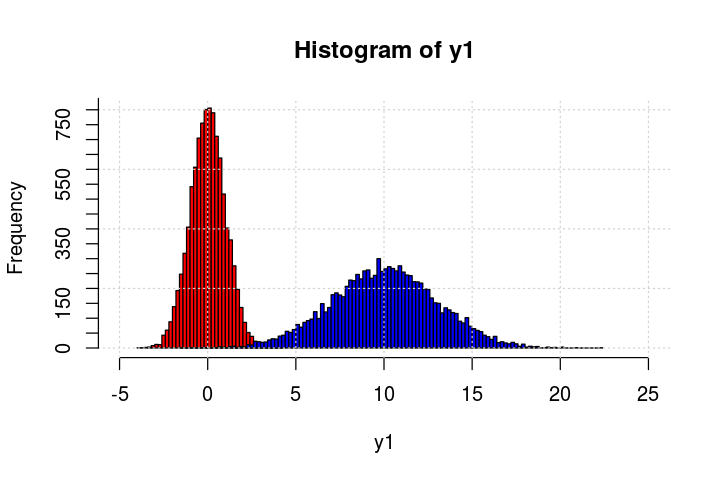

In [201]:
library(repr)
options(repr.plot.width=6, repr.plot.height=4)

x<-runif(10000)
y1<-qnorm(x)
y2<-qnorm(x, mean=10, sd=3)
hist(y1, breaks=50, xlim=c(-5, 25), col="red", yaxt="n")
hist(y2, breaks=100, add=T, col="blue")
grid()
axis(2, at=seq(0, 2000, by=50))

__This is an example of histogram overlayed with some pdfs__

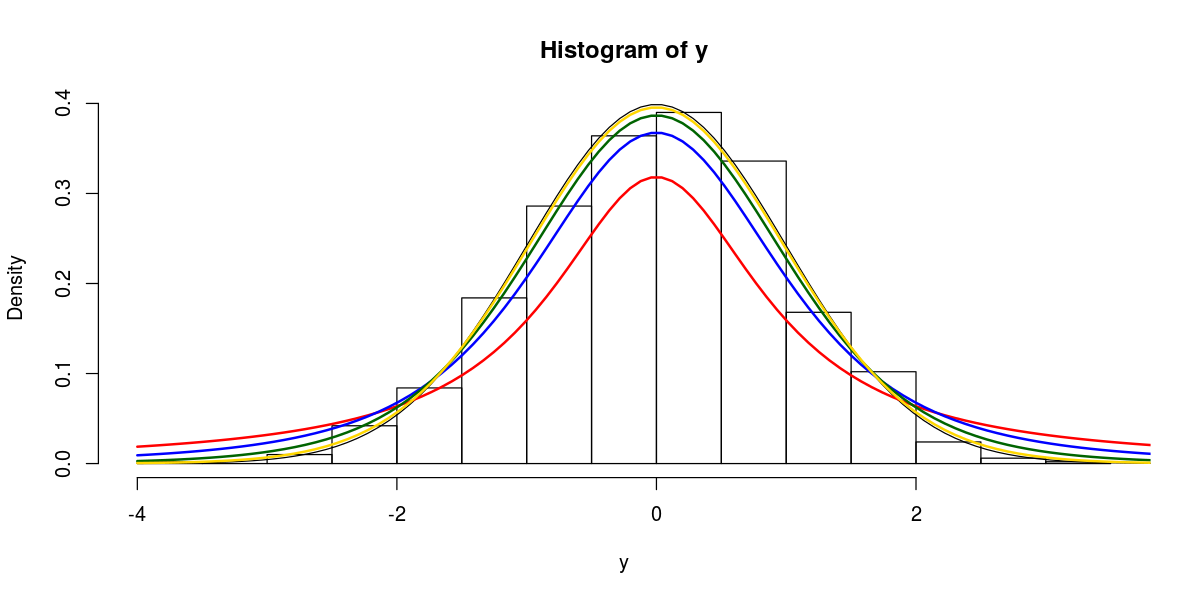

In [235]:
# Display the Student's t distributions with various
# degrees of freedom and compare to the normal distribution

x <- seq(-4, 4, length=100)
hx <- dnorm(x)

degf <- c(1, 3, 8, 30)
colors <- c("red", "blue", "darkgreen", "gold", "black")
labels <- c("df=1", "df=3", "df=8", "df=30", "normal")

y <- rnorm(1000)

hist(y, prob=T)

lines(x, hx)

for (i in 1:4){
  lines(x, dt(x,degf[i]), lwd=2, col=colors[i])
}

#legend("topright", inset=.05, title="Distributions",
#  labels, lwd=2, lty=c(1, 1, 1, 1, 2), col=colors)

__This is an example of plots in multiple pads__


Call:
	density.default(x = age.exploded, adjust = 2)

Data: age.exploded (7545 obs.);	Bandwidth 'bw' = 0.6757

       x                y            
 Min.   :-2.027   Min.   :3.444e-05  
 1st Qu.: 3.986   1st Qu.:4.225e-03  
 Median :10.000   Median :1.787e-02  
 Mean   :10.000   Mean   :4.153e-02  
 3rd Qu.:16.014   3rd Qu.:6.767e-02  
 Max.   :22.027   Max.   :1.496e-01  

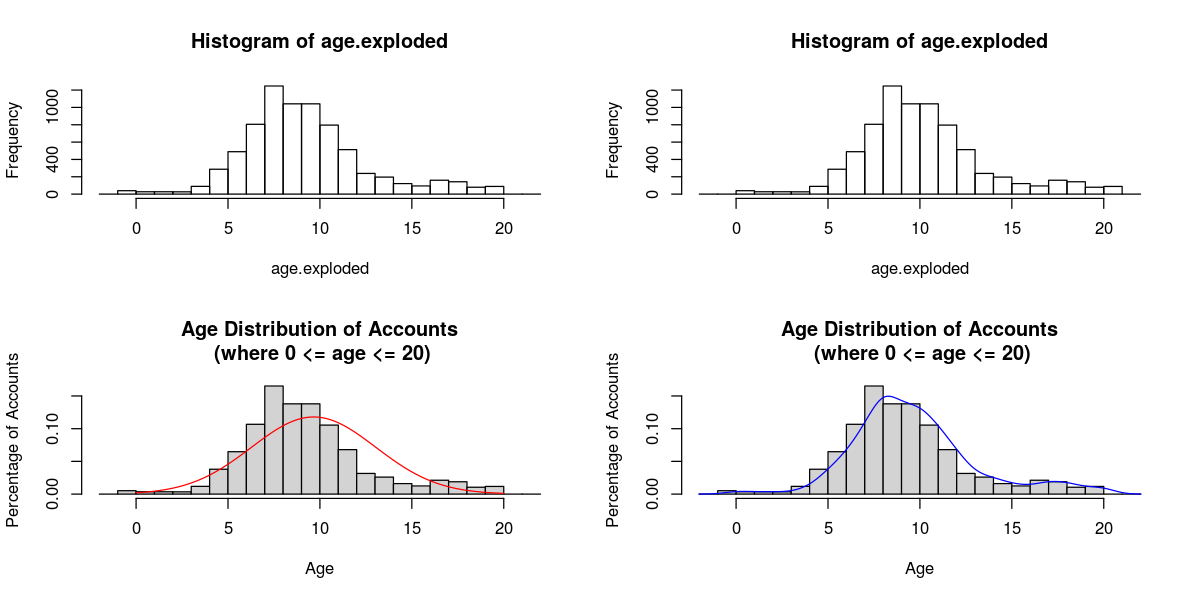

In [234]:
sample_data <- read.csv("test_data.csv")
age.exploded <- rep.int(sample_data$age, sample_data$count)

par(mfrow = c(2, 2))

options(repr.plot.width=10, repr.plot.height=5)

hist(age.exploded, breaks=seq(-2, 22, 1))

hist(age.exploded, breaks=seq(-2, 22, 1), right=F)

hist(age.exploded, breaks=seq(-2, 
  22, by=1), xlab = "Age", ylab= "Percentage of Accounts", 
  main = "Age Distribution of Accounts\n (where 0 <= age <= 20)", 
  col= "lightgray", prob=T)

mypts<-seq(min(age.exploded), max(age.exploded), length.out=200)

points(mypts, dnorm(mypts, mean(age.exploded), sd(age.exploded)), type="l", col="red")

hist(age.exploded, breaks=seq(-2, 
  22, by=1), xlab = "Age", ylab= "Percentage of Accounts", 
  main = "Age Distribution of Accounts\n (where 0 <= age <= 20)", 
  col= "lightgray", prob=T)

dens<-density(age.exploded, adjust=2)
dens

lines(dens, col="blue")



__This is an example of histogram overlayed with some other graphics.
Not completely understood as xaxis of the two objects don't match automatically__

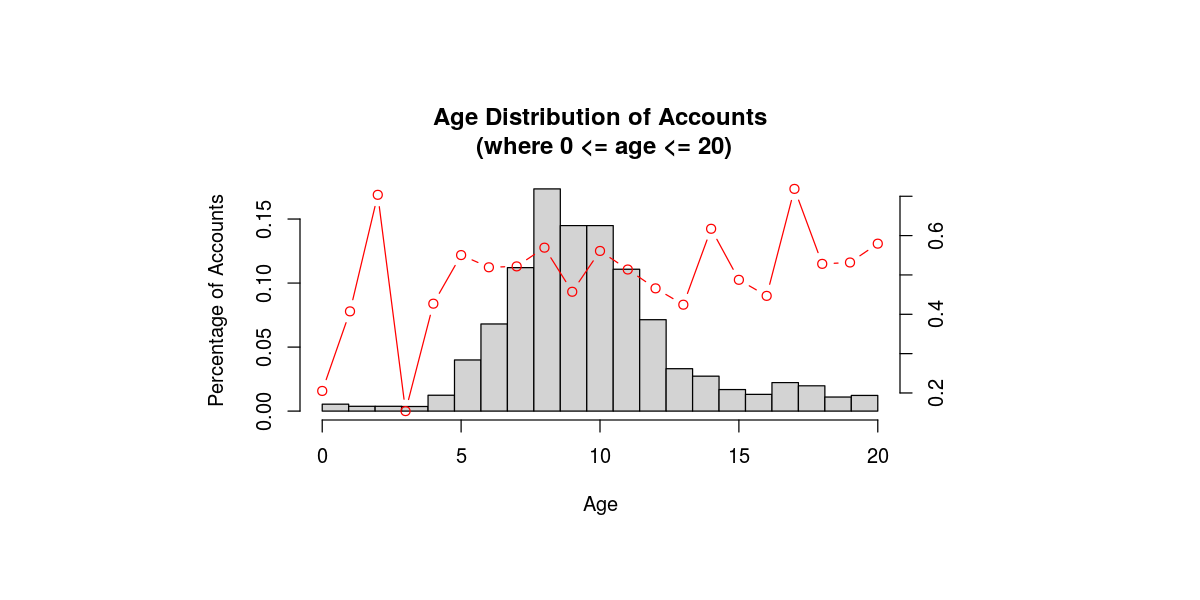

In [206]:
par(pin = c(5, 2))

hist(age.exploded, xlab = "Age", breaks=seq(min(age.exploded), max(age.exploded), length=22), ylab= "Percentage of Accounts", 
  main = "Age Distribution of Accounts\n (where 0 <= age <= 20)", 
  col= "lightgray", prob=T)

par(new=T)
plot(sample_data$age, sample_data$subscribe_pct, xlab= "", ylab="", type = "b", col = "red", axes=F)   
axis(4)


__This is an example of generation of a log normal r.v from a uniform r.v.__

[1] "The mean (sd) is: 1.68 (0.34)"

[1] "The theoretical mean (sd) is: 1.68 (0.34)"

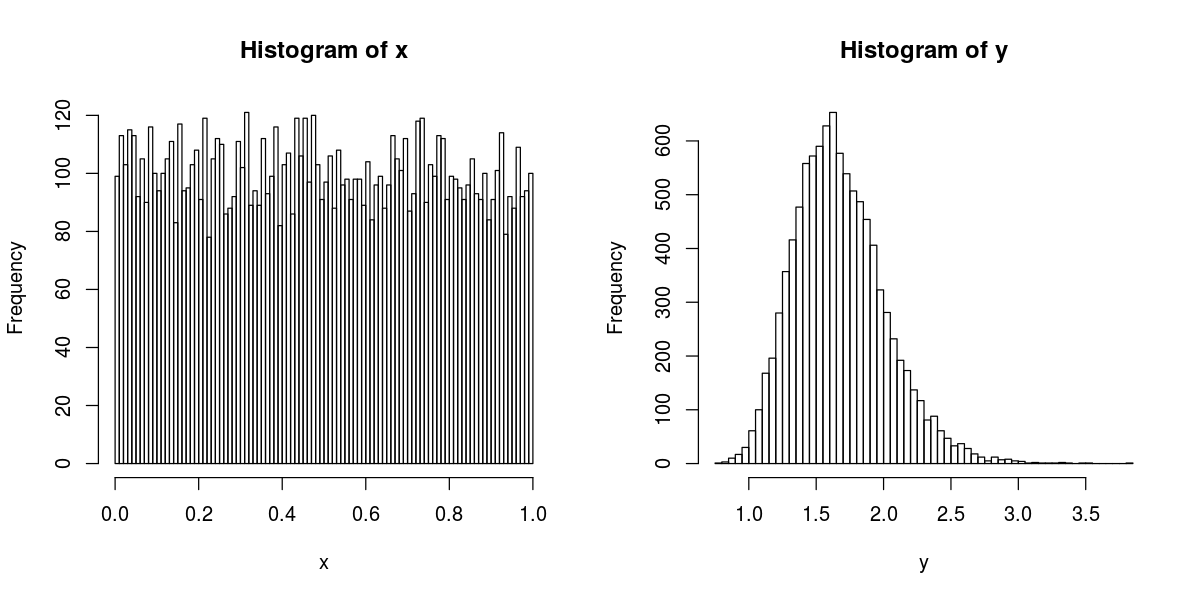

In [266]:
par(mfrow = c(1,2))
options(repr.plot.width=10, repr.plot.height=5)
x<-runif(10000)
hist(x, breaks=100)
mu<-0.5
sigma<-0.2
y<-qlnorm(x, mu, sigma)
hist(y, breaks=100)

sprintf("The mean (sd) is: %.2f (%.2f)", mean(y), sd(y))
meant<-exp(mu+sigma^2/2)
sdt<-sqrt((exp(sigma^2)-1)*exp(2*mu+sigma^2))
sprintf("The theoretical mean (sd) is: %.2f (%.2f)", meant, sdt)

__This is an example of linear regression__

'data.frame':	4 obs. of  2 variables:
 $ x: num  1 2 3 4
 $ y: num  3.08 3.43 7.74 8.6


(Intercept)           x 
  0.4942914   2.0863391

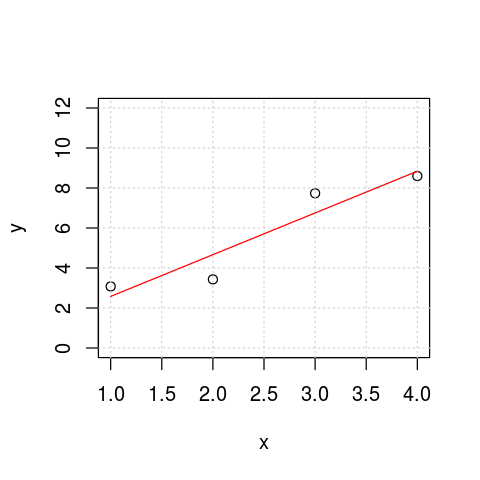

In [325]:
#set.seed(1485)
options(repr.plot.width=4, repr.plot.height=4)
x <- c(1,2,3,4)
slopet <- 2
interceptt <- 0.4

# Generate pseudo-data
y <- slopet*x + interceptt + rnorm(length(x), 0, 1)

# Making data frame
ds <- data.frame(x = x, y = y)
str(ds)

# Plot data
plot(y~x, ylim=c(0, 12))
grid()

# Make linear regression
ds.lm <- lm(y~x, data=ds)
coeffs = coefficients(ds.lm)
coeffs

# Plot fit
yt <- coeffs[2]*x+coeffs[1]
lines(x, yt, col="red")


__Same as above but several times to see distributions__

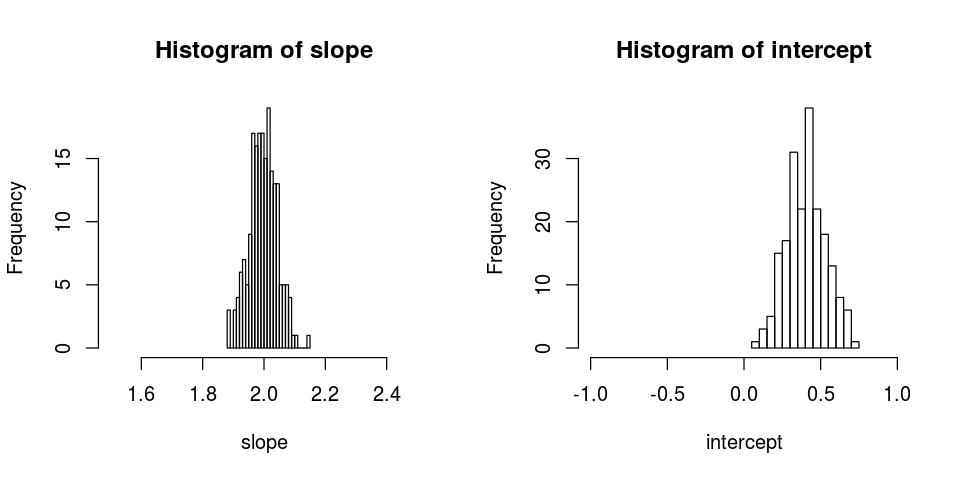

In [19]:
par(mfrow = c(1,2))
options(repr.plot.width=8, repr.plot.height=4)
x <- c(1,2,3,4)
slopet <- 2
interceptt <- 0.4

N <- 200

slope =c()
intercept = c()

for (i in 1:N) {
    y <- slopet*x + interceptt + rnorm(length(x), 0, 0.1)
    ds <- data.frame(x = x, y = y)
    ds.lm <- lm(y~x, data=ds)
    coeffs = coefficients(ds.lm)
    slope[i] <- coeffs[2]
    intercept[i] <- coeffs[1]
}

hist(slope, breaks=20, xlim=c(1.5, 2.5))
hist(intercept, breaks=20, xlim=c(-1, 1))